используя определение, оценить сложность по радемахеру для логистической регресии на breast cancer dataset из scikit-learn (бинарная классификация). Подробнее в материалах лекции и на вики.
Построить график зависимости сложности по радемахеру от коэф L2 регуляризации для alpha=np.logspace(-2,2,5). 
Для каждой точки выполнить 100 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.
Не забудьте  предварительно применить к признакам standard scaling.

In [43]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm_notebook

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load_breast_cancer()

In [5]:
data.data.shape

(569, 30)

In [10]:
alpha = np.logspace(-2, 2, 5)

In [12]:
scaler = StandardScaler()
cancer = scaler.fit_transform(data.data)

In [124]:
stds = list()
rademacher = list()

for a in tqdm_notebook(alpha):
    res = list()
    for k in range(100):
        X_train, X_test, y_train, y_test = train_test_split(cancer, data.target, test_size = 0.2)
        lg = LogisticRegression(C=a, penalty='l2')
        lg.fit(X_train, y_train)
        h = lg.decision_function(X_train)
        sigma = np.random.choice(np.array([-1, 1]), len(y_train))
        np.random.shuffle(sigma)
        margin = sigma * h
        margin = np.average(margin, weights=sigma)
        res.append(margin)
    
    rademacher.append(np.mean(res))
    stds.append(np.std(res))

A Jupyter Widget

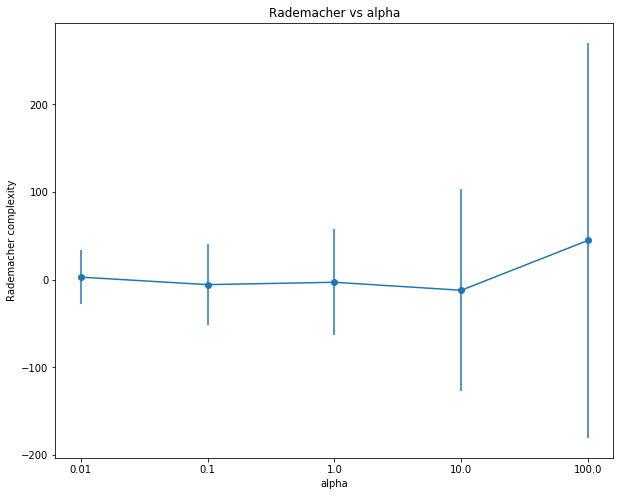

In [127]:
plt.figure(figsize=(10, 8))
plt.errorbar(np.arange(len(alpha)), rademacher, stds, fmt='-o')
plt.xticks(np.arange(len(alpha)), alpha)
plt.title('Rademacher vs alpha')
plt.xlabel('alpha')
plt.ylabel('Rademacher complexity')
plt.legend()
plt.show()

Со значениями alpha, близкими к нулю, сложность по Радемахеру незначительно падает, но на большом значении возрастает. Стандартное отклонение растёт на всей протяжённости графика. 